# HR Analytics Case Study
-  Clustering
-  https://medium.com/@JamFlores/k-prototypes-clustering-for-hr-analytics-a-working-hours-oriented-analysis-6472d38e9add
-https://github.com/joeytuason83/joeytuason83.github.io/blob/360b78c00c23353778e28ba007c8e7e67515a532/Machine%20Learning/BIA_HR%20Analytics/HR_Analytics_on_Employee_Retention_and_Attrition_(k_Prototype)_Group_1.ipynb?fbclid=IwAR11Nou8nvDEN-oZp0azzkGFQ7nKqbE-JNGPueUJH2aAFwgoBhpB0_s06SQ

## About Data
-  The data simulates a typical Business environment dataset related to Human Resources information. It contains 3 data sets:
    -  Employee data, with information like, name, Date of Birth, Date of hire, Department, etc.
    -  Action data, indicating actions like, hiring, promotions, demotions, attrition.
    -  Performance data. For each employee for each period.
-  The 3 data set can be related through the Employee ID.
-  The current data set spans over 10 periods (2015-2024) with an average active employees of 1000 per year.
-  The replacement rate (new hire and attrition) is set to be about 5% per year.
-  The age of employment is coherent with the typical distribution of ages.
-  The likelihood of promotions is linked to performance rate.
-  There are 2 planted biases in the data:
    -  A Gender Bias (Female(1) employees tend to get better performance ratings)
    -  A Race Bias (Asians (1) are more likely to be promoted)

## Tasks
-  You are tasked to give a presentation to the HR Director of a Company that answers the following:
    -  What are the most influential factors that cause an employee to leave the company?
    -  Are there inherent clusters among those who left the company? What does it mean for us?
    -  Can we predict which employee will leave (churn rate)? You may use different ML models, please report your Accuracy, Precision, and Recall?
-  What recommendations can you give the HR director?

In [7]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import plotnine
from plotnine import *
import sweetviz as sv
from matplotlib import rcParams, cycler

In [2]:
#!pip install sweetviz
#!pip install kmodes

In [9]:
#other libraries if required # category clustering
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import itertools

In [10]:
import os
F1 = '/analytics/projects/hrAnalytics/data/attrition'
M = '/Users/du/dup'
W = '/E:'
os.listdir(M+F1)
#fileLoc = (folder + filename)  or URL
#print(os.lisdir(

['HR_attr1.csv', 'HR_attr2.csv', 'HR_attr3.csv', '.ipynb_checkpoints']

In [11]:
gitLink = 'https://raw.githubusercontent.com/dupadhyaya/hrAnalytics/main/data/attrition/HR_attr2.csv'

In [12]:
#data
df = pd.read_csv(gitLink)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
#understand
df.shape

(14999, 10)

In [14]:
', '.join(df.columns.tolist())

'satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, Department, salary'

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


selCols = [....]
df[selCols].head()

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


C:\Users\du\AppData\Roaming\Python\Python39\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
C:\Users\du\AppData\Roaming\Python\Python39\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


                                             |                                             | [  0%]   00:00 ->…

C:\Users\du\AppData\Roaming\Python\Python39\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
C:\Users\du\AppData\Roaming\Python\Python39\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
C:\Users\du\AppData\Roaming\Python\Python39\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
C:\Users\du\AppData\Roaming\Python\Python39\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
C:\Users\du\AppData\Roaming\Python\


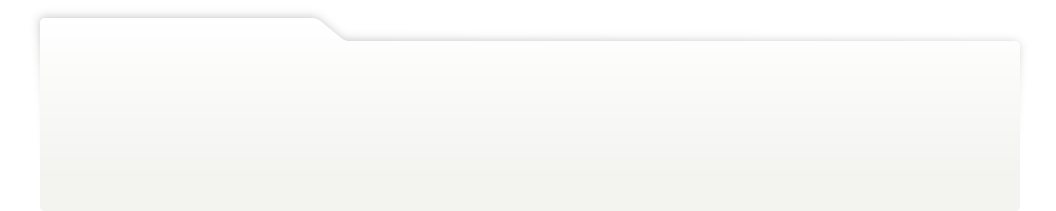
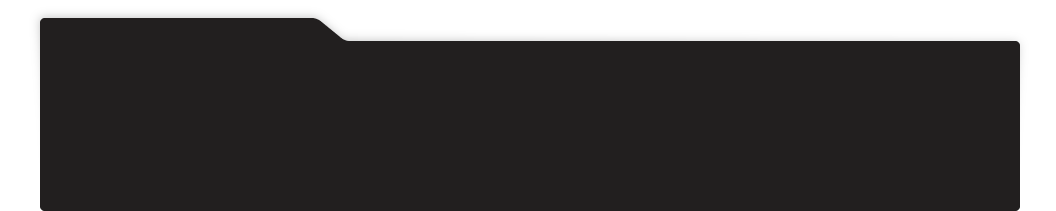
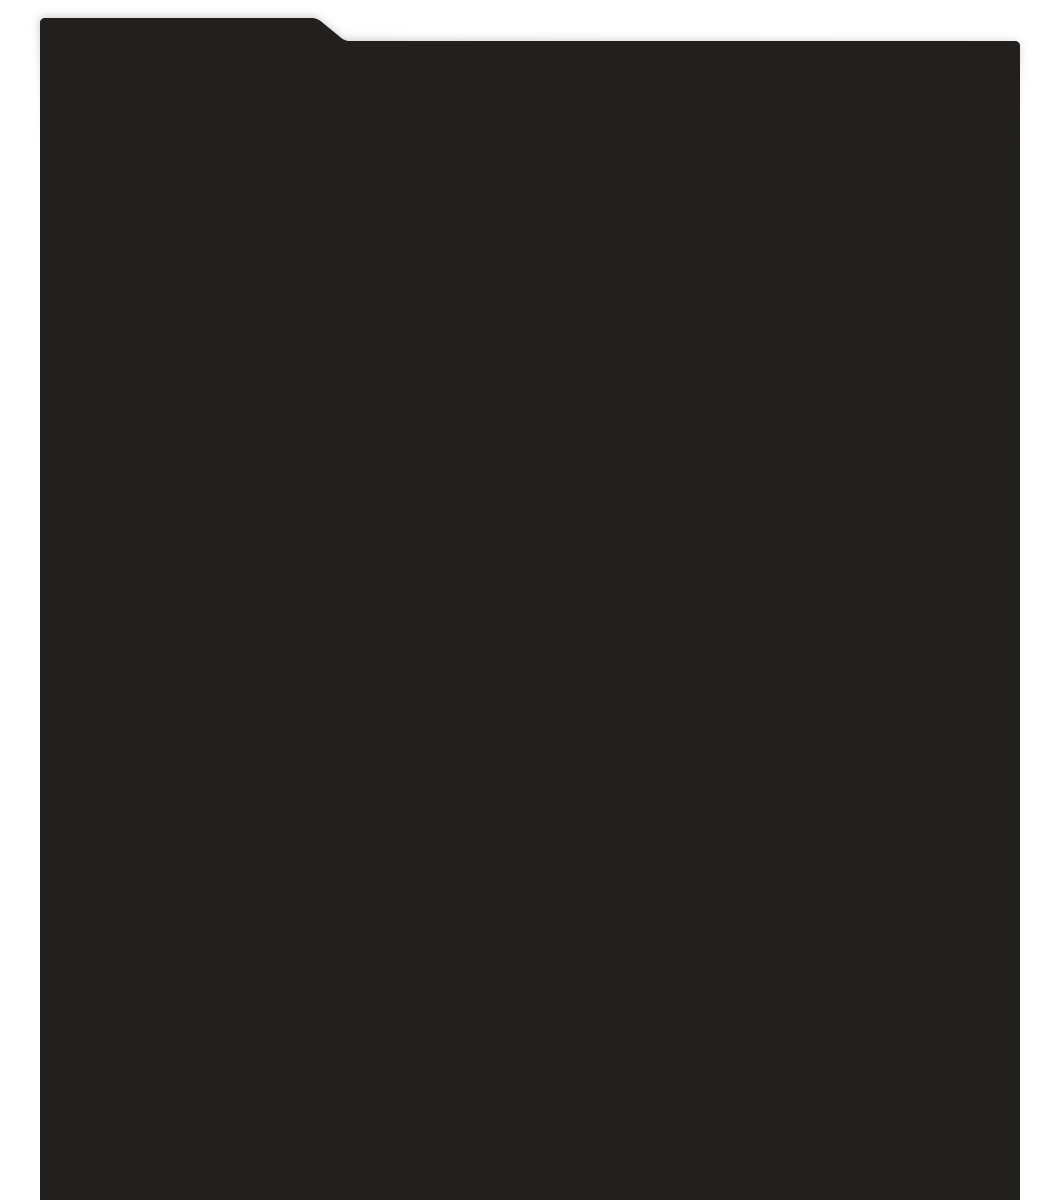
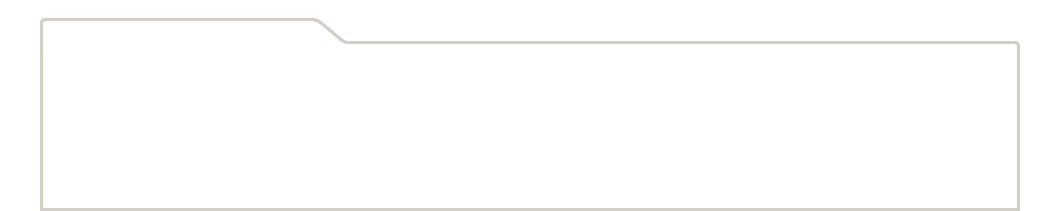
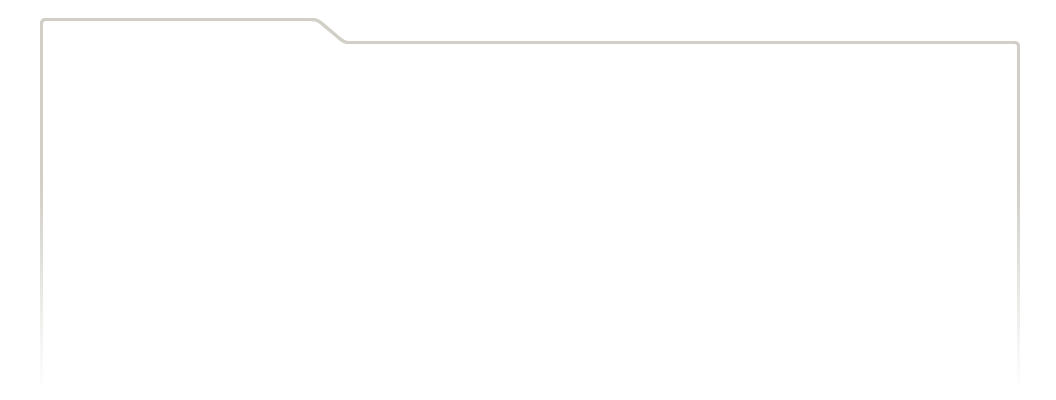
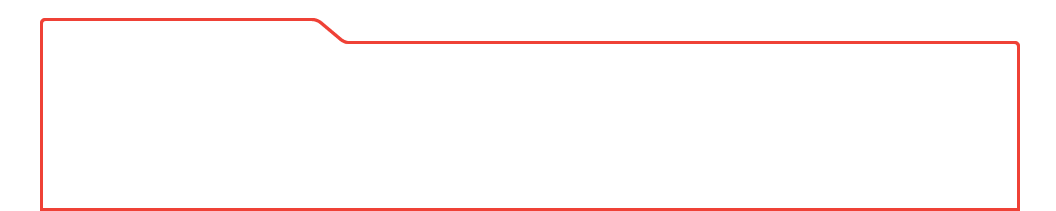
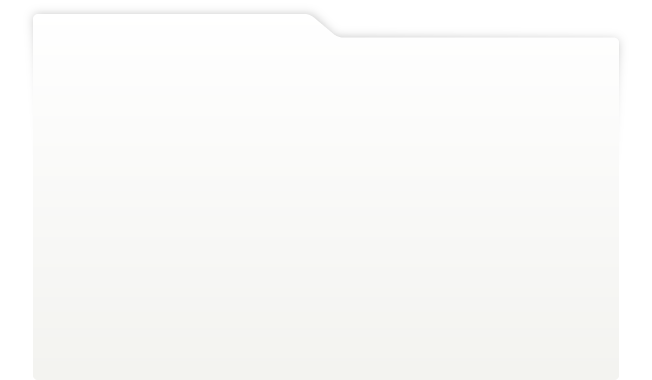
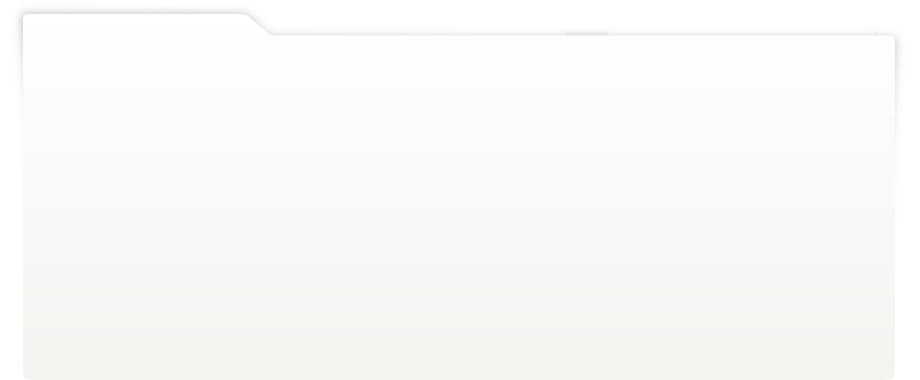
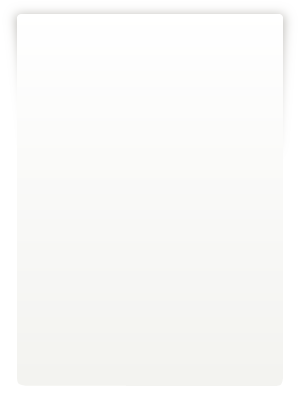
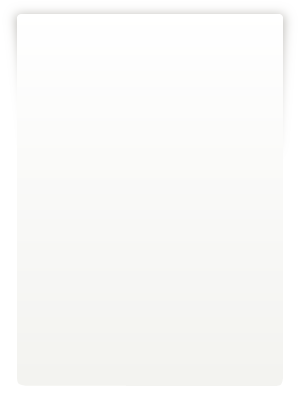
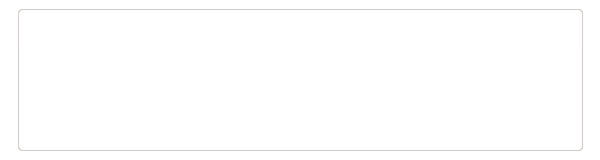
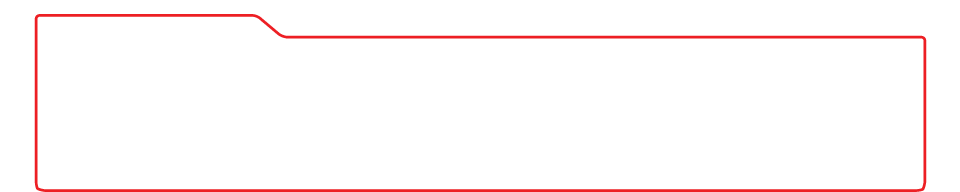
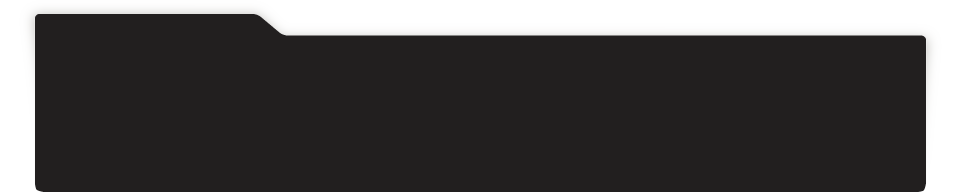
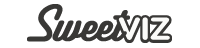
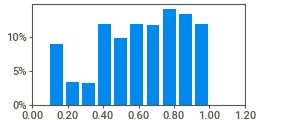
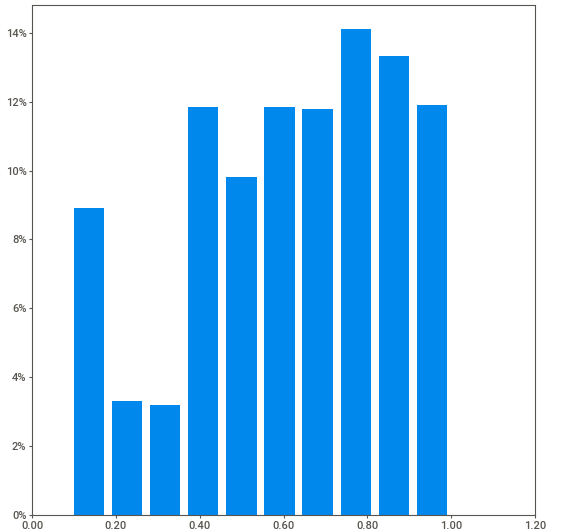
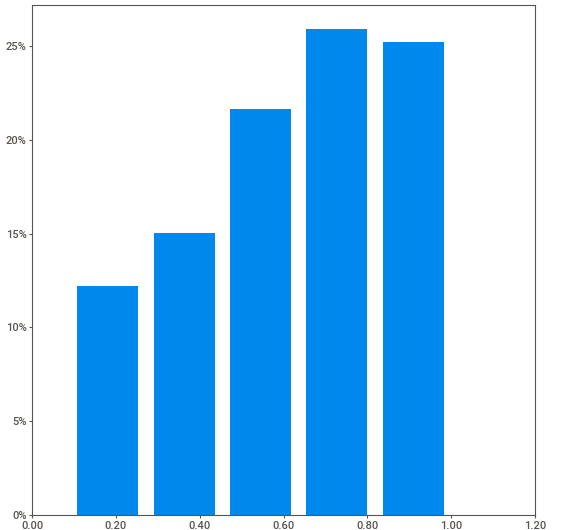
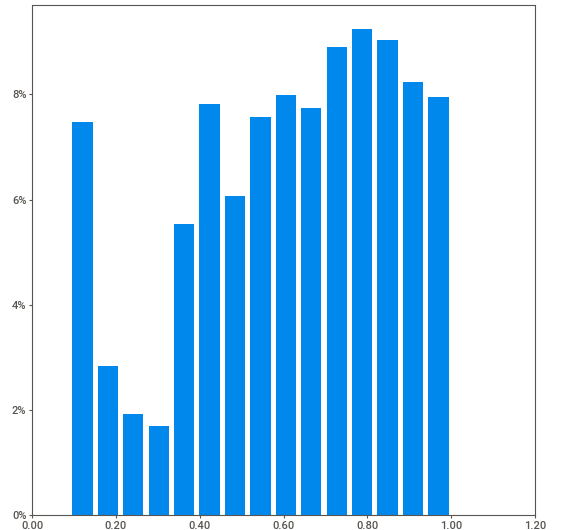
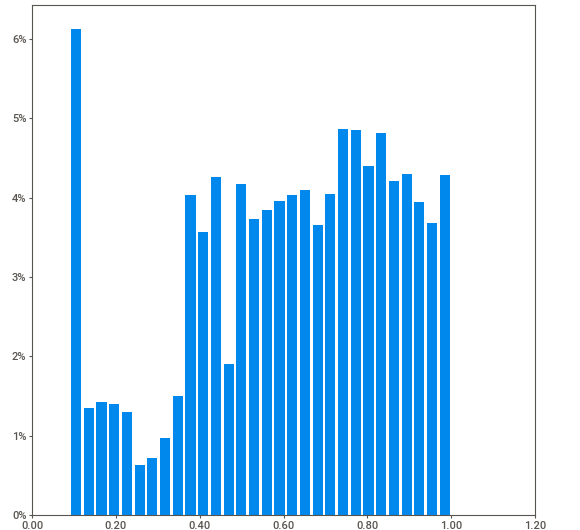
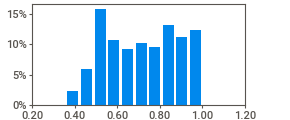
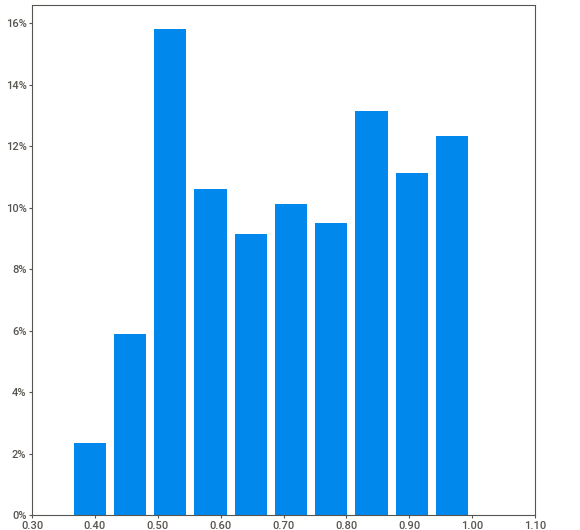
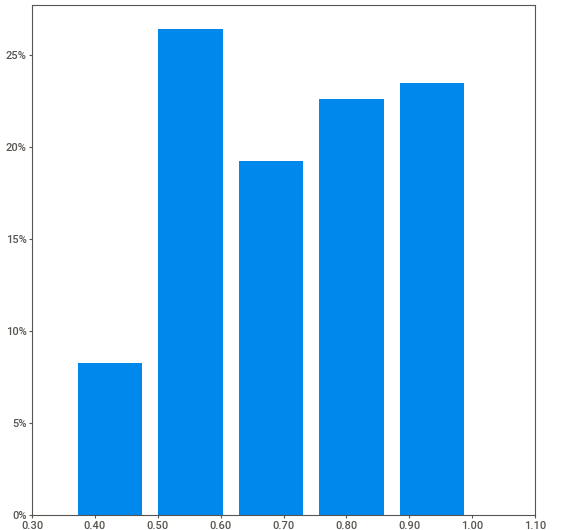
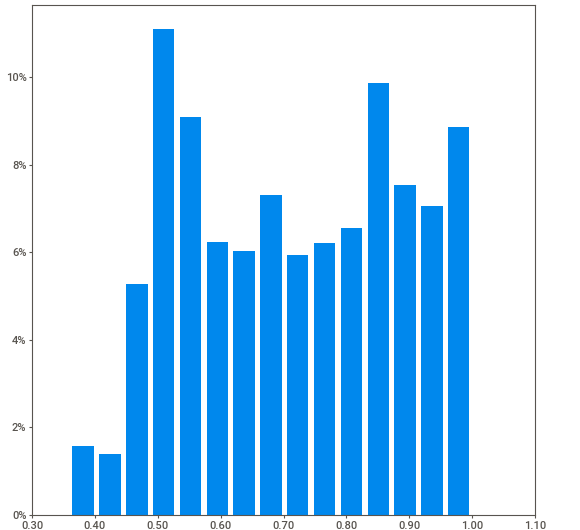
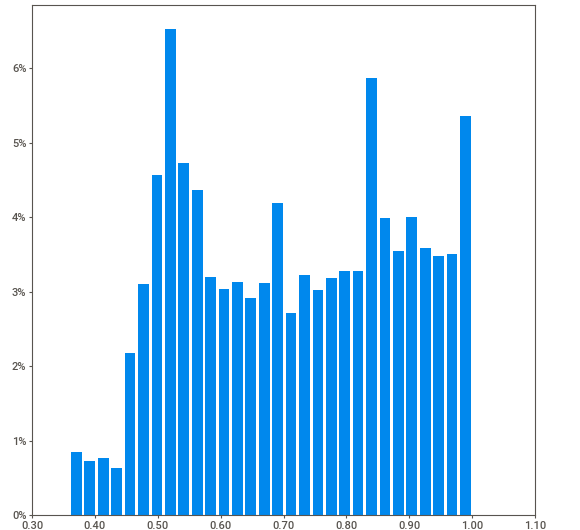
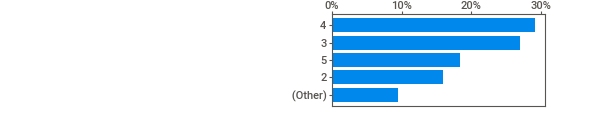
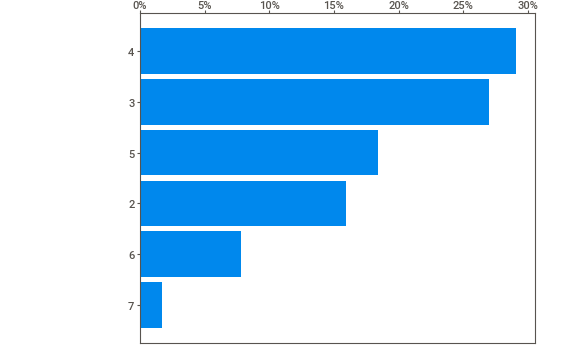
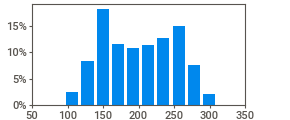
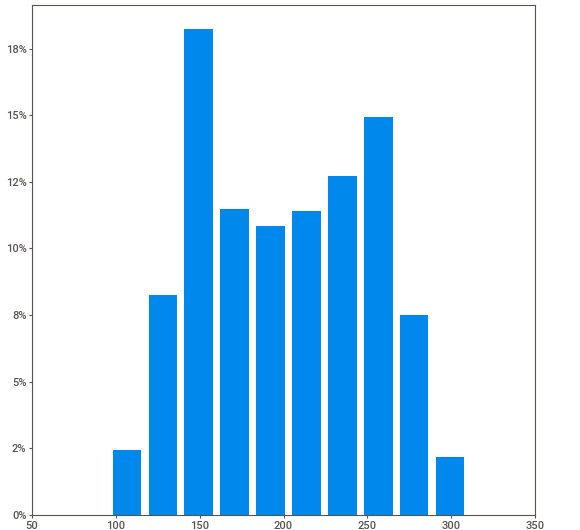
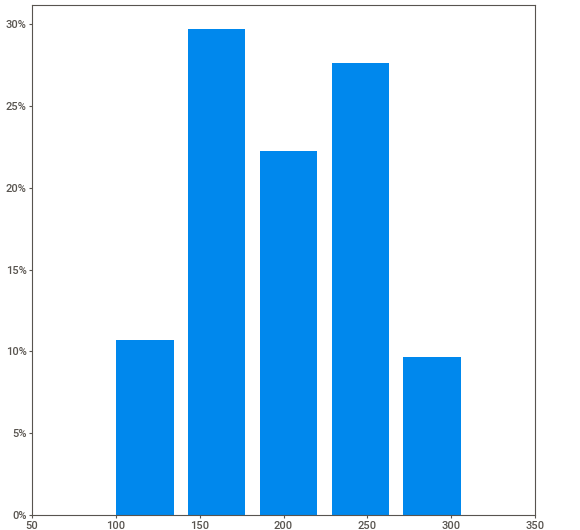
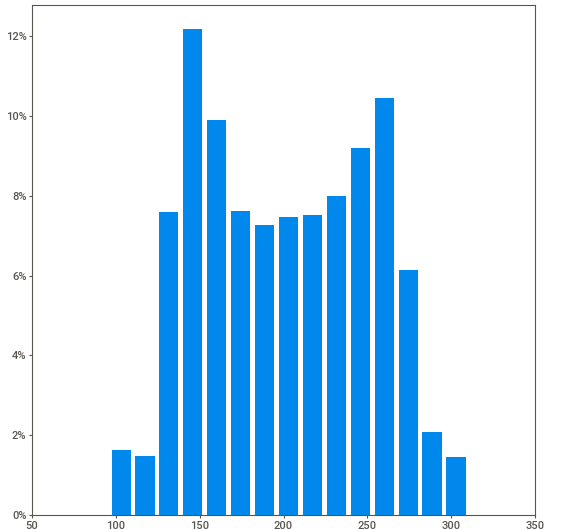
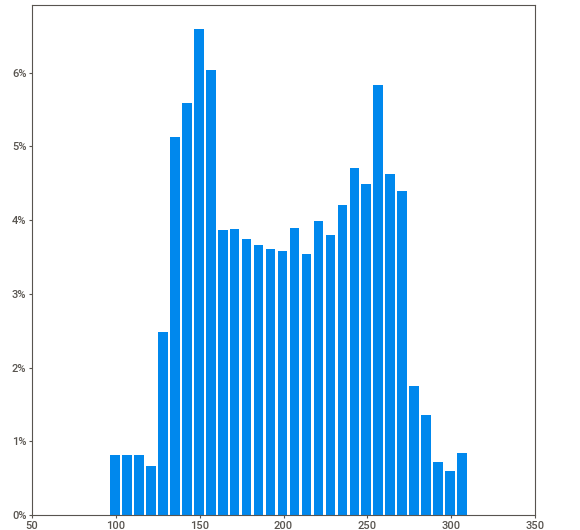
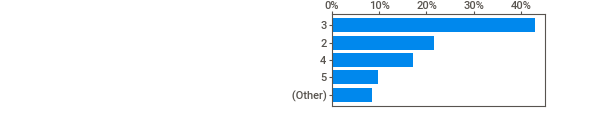
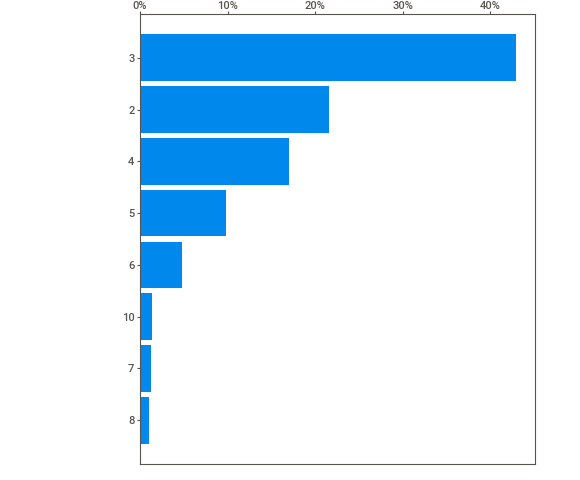
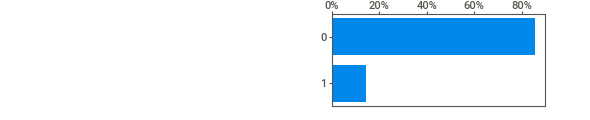
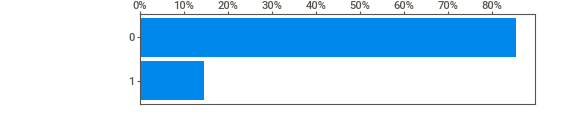
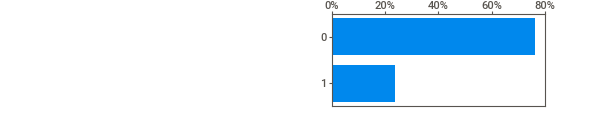
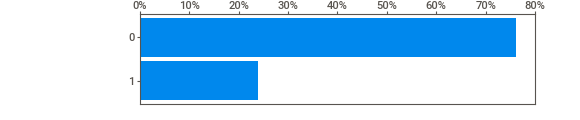
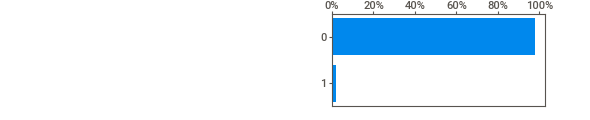
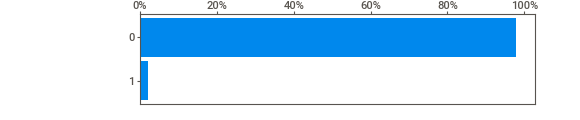
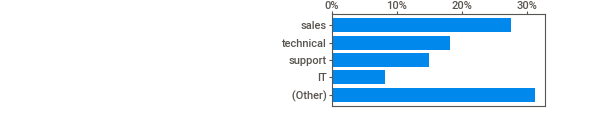
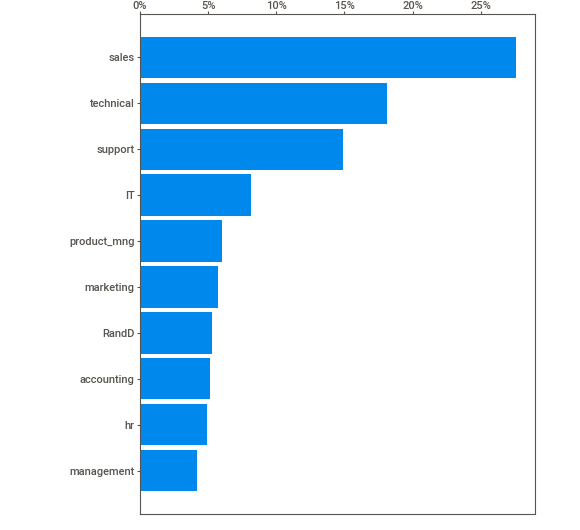
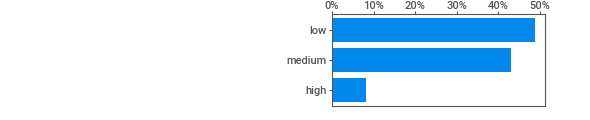
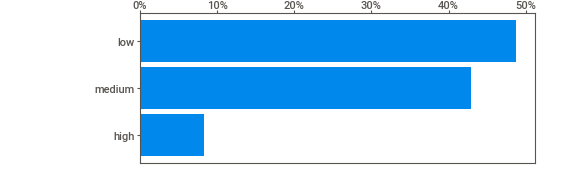
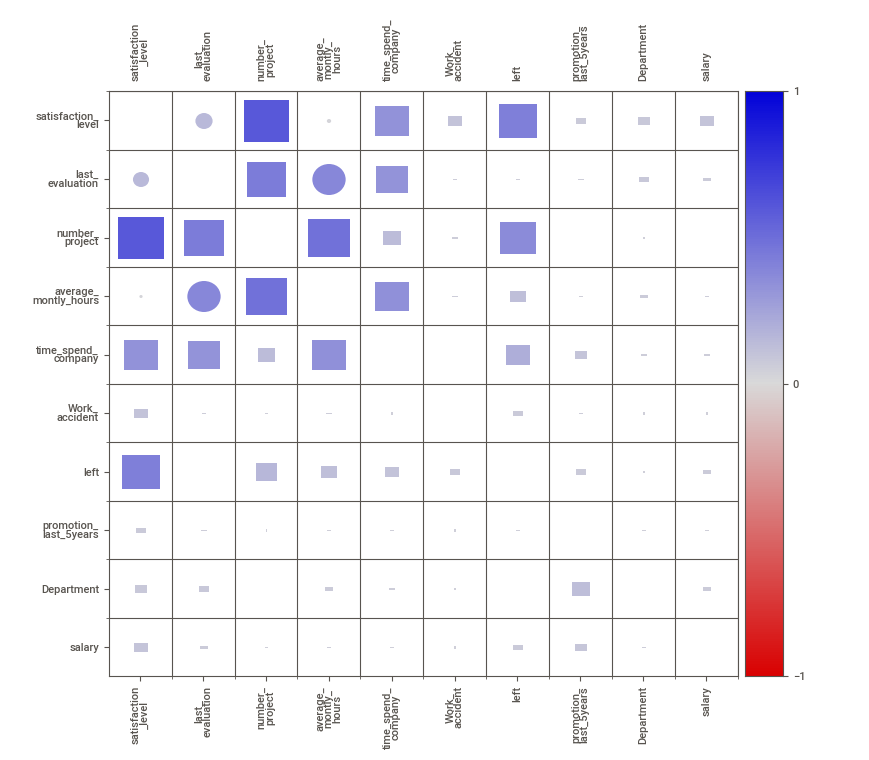
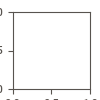

In [10]:
# EDA 
sweet_report = sv.analyze(df)
sweet_report.show_notebook(layout='vertical', scale=1)

In [11]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Department', 'salary']
Categorical columns position  : [8, 9]


In [12]:
# Convert to matrix form since this is what is required by algorithm
dfMatrix = df.to_numpy()

In [44]:
dfMatrix

array([[0.38, 0.53, 2, ..., 0, 'sales', 'low'],
       [0.8, 0.86, 5, ..., 0, 'sales', 'medium'],
       [0.11, 0.88, 7, ..., 0, 'sales', 'medium'],
       ...,
       [0.37, 0.53, 2, ..., 0, 'support', 'low'],
       [0.11, 0.96, 6, ..., 0, 'support', 'low'],
       [0.37, 0.52, 2, ..., 0, 'support', 'low']], dtype=object)

In [45]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1,   n_clusters = 5,  init = 'Huang',  random_state = 0)
kprototype.fit_predict(dfMatrix,  categorical = catColumnsPos)

array([3, 1, 1, ..., 0, 1, 3], dtype=uint16)

In [57]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.5510471204188422', '0.6227075542258803', '3.1473448017950636',
        '132.8911742707554', '3.3975317875841435', '0.12976813762154077',
        '0.3567688855646971', '0.02169035153328347', 'sales', 'low'],
       ['0.5405476804123621', '0.7832764175257695', '4.541559278350515',
        '269.27190721649487', '3.8266752577319587',
        '0.12951030927835053', '0.39207474226804123',
        '0.019007731958762885', 'sales', 'low'],
       ['0.6810141364474546', '0.7655654578979636', '4.0636140135218195',
        '234.2759680393362', '3.650276582667486', '0.14474492931776275',
        '0.2071296865396435', '0.023355869698832205', 'sales', 'low'],
       ['0.6181626319056556', '0.6753879577901922', '3.4062693978895098',
        '161.68280571073868', '3.246120422098076', '0.14369956548727497',
        '0.20670391061452514', '0.02079453755431409', 'sales', 'low'],
       ['0.6676830601092928', '0.7202732240437163', '3.7635701275045537',
        '197.1245901639344', '3.34061930783

In [58]:
# Check the iteration of the clusters created
kprototype.n_iter_

6

In [59]:
# Check the cost of the clusters created
np.round(kprototype.cost_)
#type(kprototype.cost_)

2031535.0

In [60]:
# Add the cluster to the dataframe
df['cluster_id'] = kprototype.labels_
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,cluster_id
0,0.38,0.53,2,157,3,0,1,0,sales,low,3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,2
4,0.37,0.52,2,159,3,0,1,0,sales,low,3


In [62]:
df.groupby('cluster_id').agg(np.mean)

#df.groupby('cluster_id').describe().T

C:\Users\du\AppData\Local\Temp\ipykernel_17256\3152757019.py:1: FutureWarning: The operation <function mean at 0x0000014882BC9790> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
cluster_id,,,,,,,,
0,0.551047,0.622708,3.147345,132.891174,3.397532,0.129768,0.356769,0.021690
1,0.540548,0.783276,4.541559,269.271907,3.826675,0.129510,0.392075,0.019008
2,0.681014,0.765565,4.063614,234.275968,3.650277,0.144745,0.207130,0.023356
3,0.618163,0.675388,3.406269,161.682806,3.246120,0.143700,0.206704,0.020795
4,0.667683,0.720273,3.763570,197.124590,3.340619,0.177049,0.021858,0.021494


In [63]:
for x in df.columns[:-1]:
  print(df.loc[:,['cluster_id',x]].groupby('cluster_id').describe().T)
#df.groupby('cluster_id').describe().T

cluster_id                          0            1            2            3  \
satisfaction_level count  2674.000000  3104.000000  3254.000000  3222.000000   
                   mean      0.551047     0.540548     0.681014     0.618163   
                   std       0.208221     0.313673     0.227164     0.219836   
                   min       0.110000     0.090000     0.090000     0.100000   
                   25%       0.400000     0.120000     0.570000     0.430000   
                   50%       0.480000     0.620000     0.740000     0.620000   
                   75%       0.720000     0.810000     0.840000     0.800000   
                   max       1.000000     1.000000     1.000000     1.000000   

cluster_id                          4  
satisfaction_level count  2745.000000  
                   mean      0.667683  
                   std       0.219747  
                   min       0.090000  
                   25%       0.540000  
                   50%       0.690000  

In [17]:
#Break here
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
# Univariate Analysis
gpLeft = df.groupby('left')
repLeft = {1:'Left',0:'Stayed'}
emp_left = gpLeft.get_group(1)
emp_stayed = gpLeft.get_group(0)
df.groupby('left', as_index=False).size()

,left,size
0,0,11428
1,1,3571


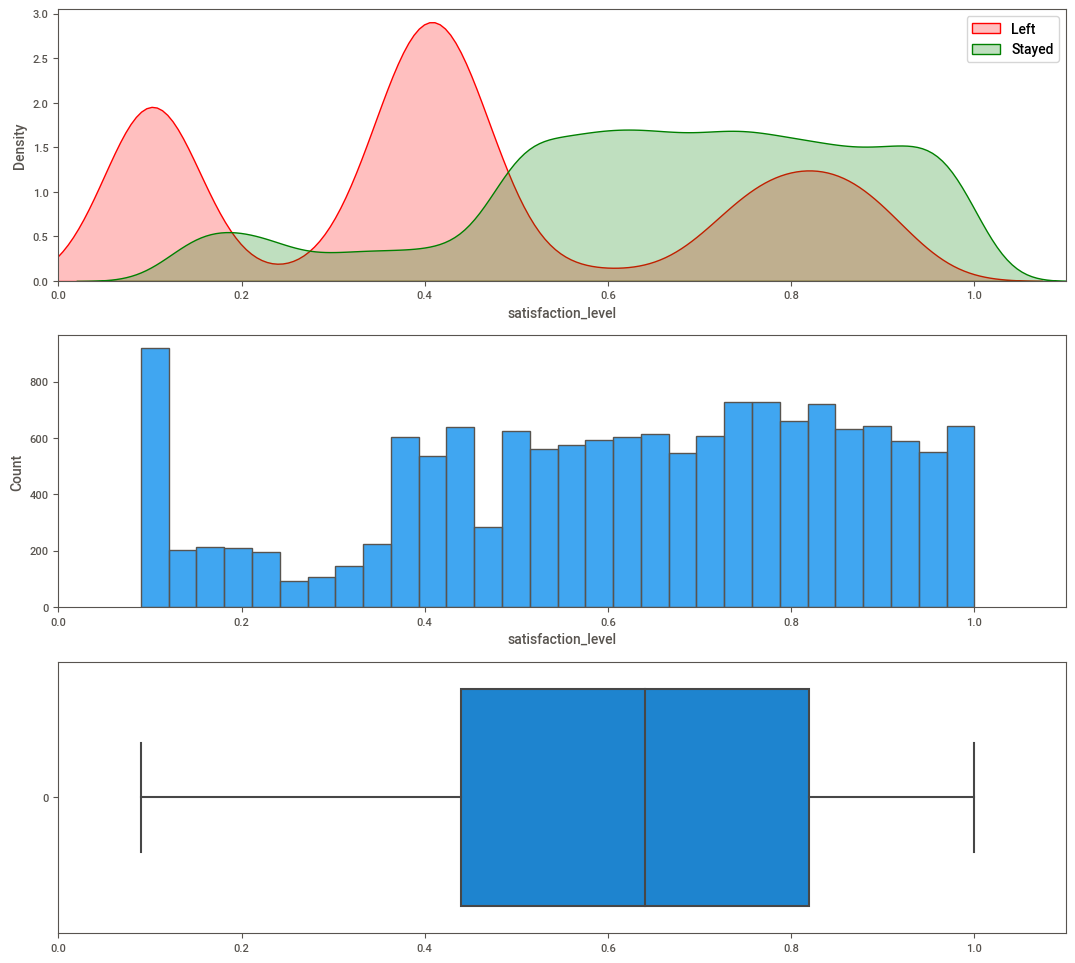

In [38]:
fig, axs = plt.subplots(nrows= 3, figsize=(13,12))
sns.kdeplot(emp_left.satisfaction_level, ax=axs[0] , fill=True, color="r")
kde_plot = sns.kdeplot(emp_stayed.satisfaction_level, ax=axs[0], fill=True, color="g")
kde_plot.legend(labels=['Left', 'Stayed'])
hist_plot = sns.histplot(df.satisfaction_level, ax=axs[1])
box_plot = sns.boxplot(df.satisfaction_level, ax=axs[2], orient='h')
kde_plot.set(xlim=(0,1.1))
hist_plot.set(xlim=(0,1.1))
box_plot.set(xlim=(0,1.1))
plt.show();

A bimodal shape (Well, more or less), one peak for the bitter employees at the lower end of satisfaction and another one well spread from medium to high satisfaction.

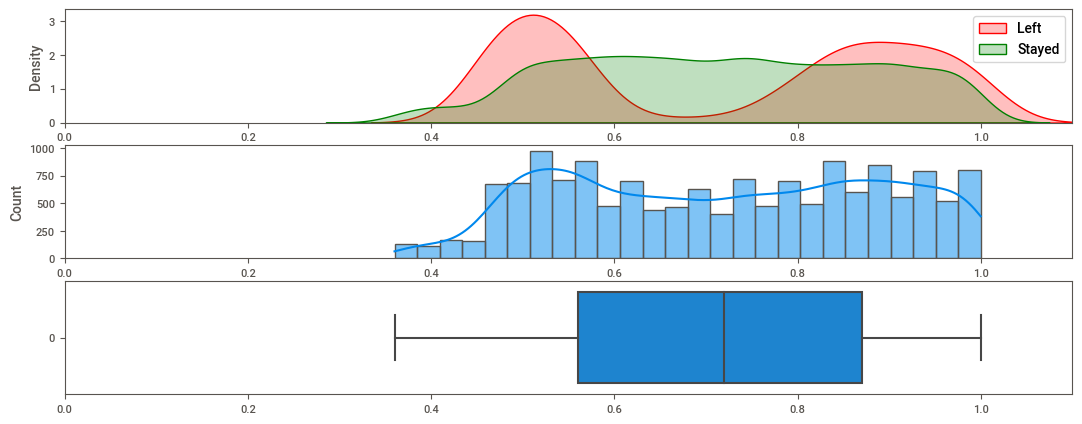

In [53]:
fig, axs = plt.subplots(nrows= 3, figsize=(13, 5))

sns.kdeplot(emp_left.last_evaluation, ax=axs[0], fill=True, color="r")
kde_plot = sns.kdeplot(emp_stayed.last_evaluation, ax=axs[0], fill=True, color="g")
kde_plot.legend(labels=['Left', 'Stayed'])
hist_plot = sns.histplot(df.last_evaluation, ax=axs[1],  kde=True)
box_plot = sns.boxplot(df.last_evaluation, ax=axs[2] , orient='h')

kde_plot.set(xlim=(0,1.1))
hist_plot.set(xlim=(0,1.1))
box_plot.set(xlim=(0,1.1))
plt.show();

Another bimodal. very little employees were evaluated below 0.5. A more is around the middle mark and another near the high mark. The other thing to note here is that the evluation has a finer resolution than it would seem, it is not just a 1..2..3 discrete values, it is an evaluation with 100 steps.

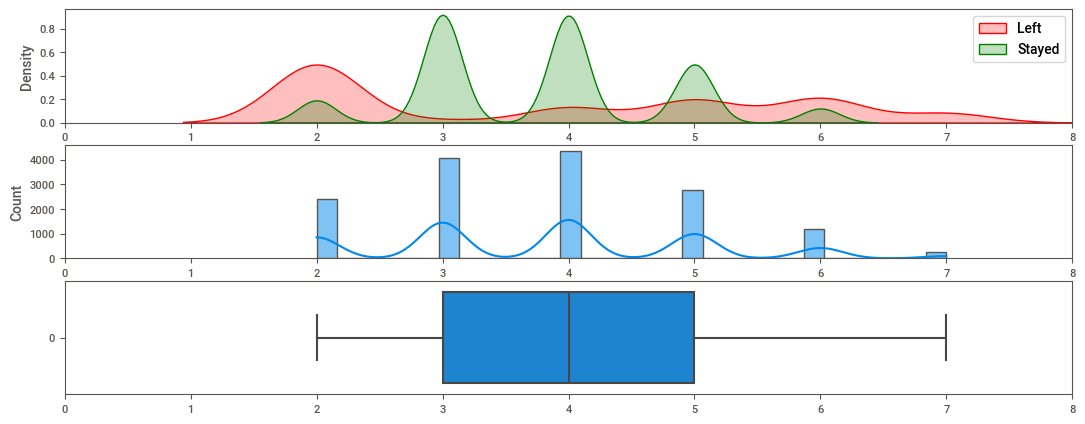

In [52]:
fig, axs = plt.subplots(nrows= 3, figsize=(13, 5))

sns.kdeplot(emp_left.number_project, ax=axs[0], fill=True, color="r")
kde_plot = sns.kdeplot(emp_stayed.number_project, ax=axs[0], fill=True, color="g")
kde_plot.legend(labels=['Left', 'Stayed'])

hist_plot = sns.histplot(df.number_project, ax=axs[1], kde=True)
box_plot = sns.boxplot(df.number_project, ax=axs[2], orient='h')

kde_plot.set(xlim=(0,8))
hist_plot.set(xlim=(0,8))
box_plot.set(xlim=(0,8))
plt.show();

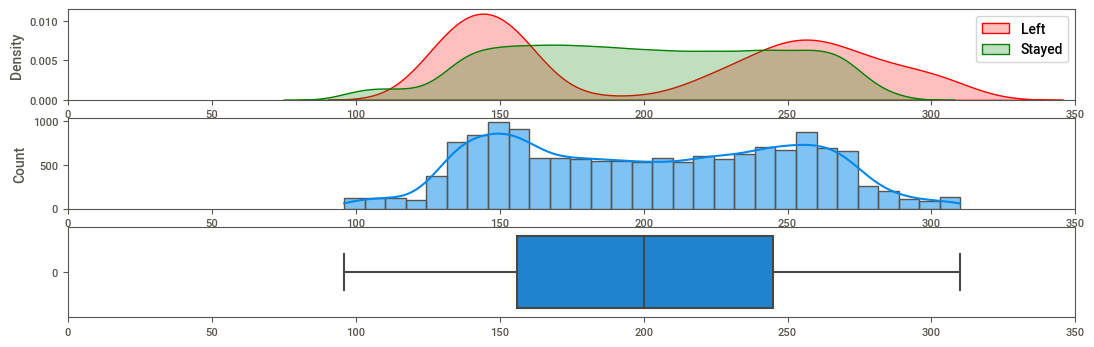

In [51]:
#avg monthly hours
fig, axs = plt.subplots(nrows=3, figsize=(13, 4))

sns.kdeplot(emp_left.average_montly_hours, ax=axs[0], fill=True, color="r")
kde_plot = sns.kdeplot(emp_stayed.average_montly_hours, ax=axs[0], fill=True, color="g")
kde_plot.legend(labels=['Left', 'Stayed'])

hist_plot = sns.histplot(df.average_montly_hours, ax=axs[1], kde=True)
box_plot = sns.boxplot(df.average_montly_hours, ax=axs[2], orient='h')

kde_plot.set(xlim=(0,350))
hist_plot.set(xlim=(0,350))
box_plot.set(xlim=(0,350))
plt.show();

nother bimodal shape, one at around 150 hours a month and the other is a little over 250 hours a month. Some very high values, 300 (?!) hours a month. That means if this employee never takes any days off, they work 10 hours a day. If they take one day off, it would be 11.5 hours of work, and two days weekend would mean they work for 13 hours a day.

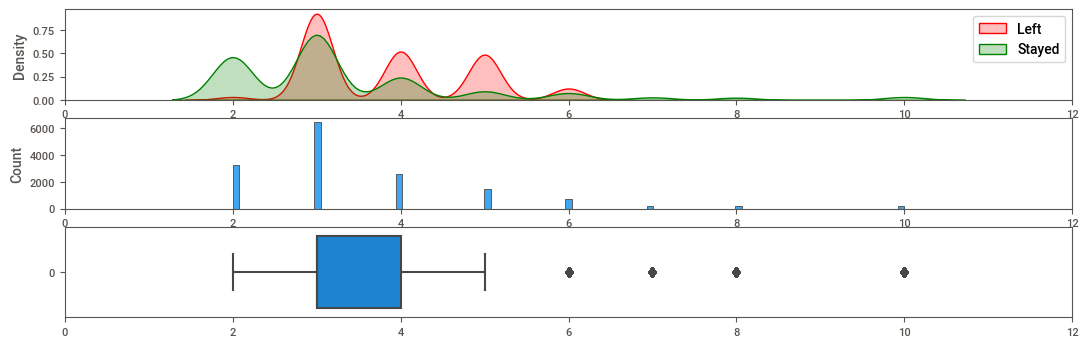

In [50]:
#no of years in coy
fig, axs = plt.subplots(nrows=3, figsize=(13, 4))

sns.kdeplot(emp_left.time_spend_company, ax=axs[0], fill=True, color="r")
kde_plot = sns.kdeplot(emp_stayed.time_spend_company, ax=axs[0], fill=True, color="g")
kde_plot.legend(labels=['Left', 'Stayed'])

hist_plot = sns.histplot(df.time_spend_company, ax=axs[1], kde=False)
box_plot = sns.boxplot(df.time_spend_company, ax=axs[2], orient='h')

kde_plot.set(xlim=(0,12))
hist_plot.set(xlim=(0,12))
box_plot.set(xlim=(0,12))
plt.show();

Interestingly, none of the surveyed employees worked for less than two years. That raises some concerns about the randomness of picking the subjects, there was a certain bias for those who stayed longer. We have to take that into account, to start with. Going back to the dataset's welcome page, it was clearly stated that this is a simulated dataset, so maybe this is why.

But disregarding that previous point the employees were mostly centered around 3 years.

In [58]:
df.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

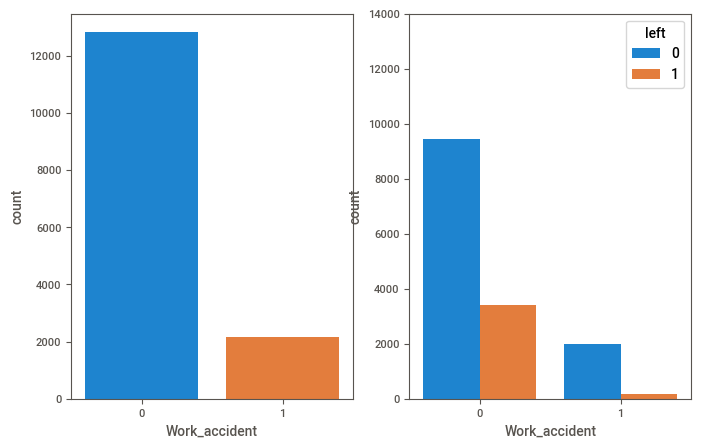

In [60]:
#Employees Who Suffered Work Related Accidents
fig, axs = plt.subplots(ncols= 2, figsize=(8, 5))

work_accidents_plt = sns.countplot(data=df, x='Work_accident', ax=axs[0]);
#annotate_bars(bar_plt=work_accidents_plt, bar_plt_var=hr_df.Work_accident, x_offset=0.3, y_offset=1100)
    
bar_plot = sns.countplot(x=df.Work_accident, hue=df.left, ax=axs[1])
#annotate_bars(bar_plt=bar_plot, by=df.Work_accident, bar_plt_var=df.Work_accident, x_offset=0.1, txt_color="black")
bar_plot.set(ylim=(0,14000))
plt.show();

#very few accidents, very few with accident left

## continue your ex from here
https://www.kaggle.com/code/etakla/hr-analytics-full-eda-and-modeling-who-will-leave

In [11]:
#end 